#### **NLP ML Model**

*The project tries to do the sentiment analysis and prediction of imdb reviews.*<br>
*Data source:https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews*

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
#pip install wordcloud
from wordcloud import WordCloud
#nltk.download('wordnet')
#nltk.download('omw-1.4')
from nltk.probability import FreqDist


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [133]:
data=pd.read_csv("D:\Beinex\Python\Dataset-Kaggle\IMDB Dataset.csv")

##### **EDA**

In [134]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [136]:
#duplicates are found
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [138]:
#dropping the duplicate rows
data=data.drop_duplicates()
data.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


In [139]:
#due to computational limitation I have selected only first 5000 datapoints
data=data[0:5000]

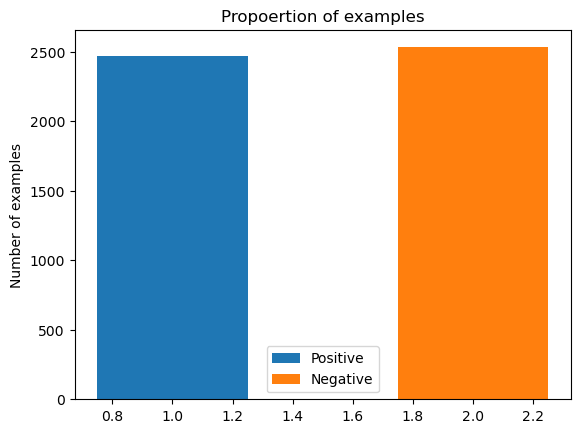

In [140]:
#Plotting the distribution
df_pos=data[data['sentiment'] == 'positive'].shape[0]
df_neg=data[data['sentiment'] == 'negative'].shape[0]

# bar plot of the 3 classes
plt.bar(1,df_pos,0.5, label="Positive")
plt.bar(2,df_neg,0.5, label="Negative")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propoertion of examples')
plt.show()


In [141]:
data=data.astype(str)


##### **Feature Engineering**

In [143]:
#tagging positive and negative reviews to 1 and 0
data=data.replace({'sentiment':{'positive':1,'negative':0}})

In [144]:
x=data

In [145]:
#selecting dependent and independent variables
x=data['review']
Y=data['sentiment']
print(x,Y)

0       One of the other reviewers has mentioned that ...
1       A wonderful little production. <br /><br />The...
2       I thought this was a wonderful way to spend ti...
3       Basically there's a family where a little boy ...
4       Petter Mattei's "Love in the Time of Money" is...
                              ...                        
4998    I rented this movie, after hearing Chris Gore ...
4999    This was a big disappointment for me. I think ...
5000    Not a movie for everyone, but this movie is in...
5001    This film is not your typical Hollywood fare, ...
5002    RKO Radio Pictures made a real classic in 1947...
Name: review, Length: 5000, dtype: object 0       1
1       1
2       1
3       0
4       1
       ..
4998    0
4999    0
5000    1
5001    1
5002    1
Name: sentiment, Length: 5000, dtype: int64


In [146]:
len(x)

5000

In [147]:
x=x.apply(word_tokenize)
print(x)


0       [One, of, the, other, reviewers, has, mentione...
1       [A, wonderful, little, production, ., <, br, /...
2       [I, thought, this, was, a, wonderful, way, to,...
3       [Basically, there, 's, a, family, where, a, li...
4       [Petter, Mattei, 's, ``, Love, in, the, Time, ...
                              ...                        
4998    [I, rented, this, movie, ,, after, hearing, Ch...
4999    [This, was, a, big, disappointment, for, me, ....
5000    [Not, a, movie, for, everyone, ,, but, this, m...
5001    [This, film, is, not, your, typical, Hollywood...
5002    [RKO, Radio, Pictures, made, a, real, classic,...
Name: review, Length: 5000, dtype: object


In [150]:
type(x)
x=x.astype(str)

In [151]:
x= x.apply(str.lower)
print(x)

0       ['one', 'of', 'the', 'other', 'reviewers', 'ha...
1       ['a', 'wonderful', 'little', 'production', '.'...
2       ['i', 'thought', 'this', 'was', 'a', 'wonderfu...
3       ['basically', 'there', "'s", 'a', 'family', 'w...
4       ['petter', 'mattei', "'s", '``', 'love', 'in',...
                              ...                        
4998    ['i', 'rented', 'this', 'movie', ',', 'after',...
4999    ['this', 'was', 'a', 'big', 'disappointment', ...
5000    ['not', 'a', 'movie', 'for', 'everyone', ',', ...
5001    ['this', 'film', 'is', 'not', 'your', 'typical...
5002    ['rko', 'radio', 'pictures', 'made', 'a', 'rea...
Name: review, Length: 5000, dtype: object


In [152]:
#replace regular expression (values that are not alphanumeric, whitepaces and digits)
x_n= x.apply(lambda doc: re.sub(r'[^a-zA-Z\s]', '', doc))
print(x_n)

0       one of the other reviewers has mentioned that ...
1       a wonderful little production   br    br   the...
2       i thought this was a wonderful way to spend ti...
3       basically there s a family where a little boy ...
4       petter mattei s  love in the time of money  is...
                              ...                        
4998    i rented this movie  after hearing chris gore ...
4999    this was a big disappointment for me  i think ...
5000    not a movie for everyone  but this movie is in...
5001    this film is not your typical hollywood fare  ...
5002    rko radio pictures made a real classic in  and...
Name: review, Length: 5000, dtype: object


In [153]:
#nltk.download('stopwords')
stop_words=set(stopwords.words("english"))
x_s=x_n.apply(lambda doc: ' '.join(w for w in doc.split() if w not in stop_words))

print(x_s)
type(x_s)

0       one reviewers mentioned watching oz episode ho...
1       wonderful little production br br filming tech...
2       thought wonderful way spend time hot summer we...
3       basically family little boy jake thinks zombie...
4       petter mattei love time money visually stunnin...
                              ...                        
4998    rented movie hearing chris gore saying somethi...
4999    big disappointment think worst mastroiannimovi...
5000    movie everyone movie top lover black comedy ca...
5001    film typical hollywood fare though pickings ba...
5002    rko radio pictures made real classic even mana...
Name: review, Length: 5000, dtype: object


pandas.core.series.Series

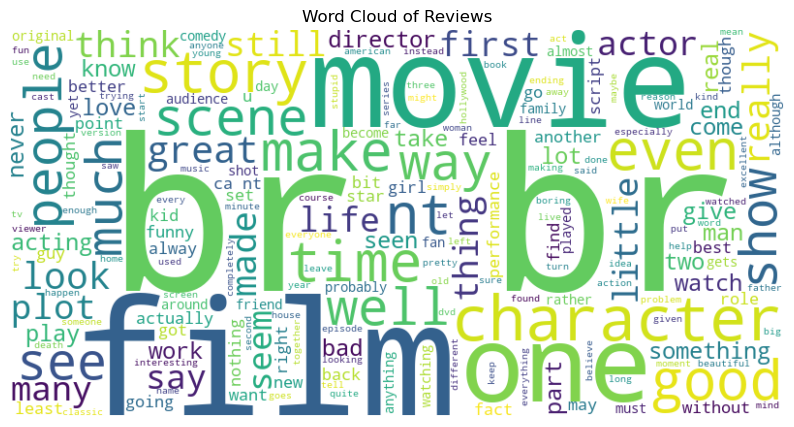

In [155]:
#Combine all reviews into a single string
all_reviews= ' '.join(x_s)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='White').generate(all_reviews)

#Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [156]:
#form the wordcloud I understood there is more words need to be removed as stopwords. 
#so updating the current stop_words list for better sorted output
add_stpwrds={'br','one','nt','without','film','movie','movies','films','would','get','even'}
stop_words.update(add_stpwrds)
x_snew=x_s.apply(lambda doc: ' '.join(w for w in doc.split() if w not in stop_words))

In [157]:
from nltk.stem import WordNetLemmatizer as lm
x_l=x_snew.apply(lambda doc:' '.join(lm().lemmatize(word) for word in doc.split()))
print(x_l)

0       reviewer mentioned watching oz episode hooked ...
1       wonderful little production filming technique ...
2       thought wonderful way spend time hot summer we...
3       basically family little boy jake think zombie ...
4       petter mattei love time money visually stunnin...
                              ...                        
4998    rented hearing chris gore saying something eff...
4999    big disappointment think worst mastroiannimovi...
5000    everyone top lover black comedy cast including...
5001    typical hollywood fare though picking bad ofte...
5002    rko radio picture made real classic managed no...
Name: review, Length: 5000, dtype: object


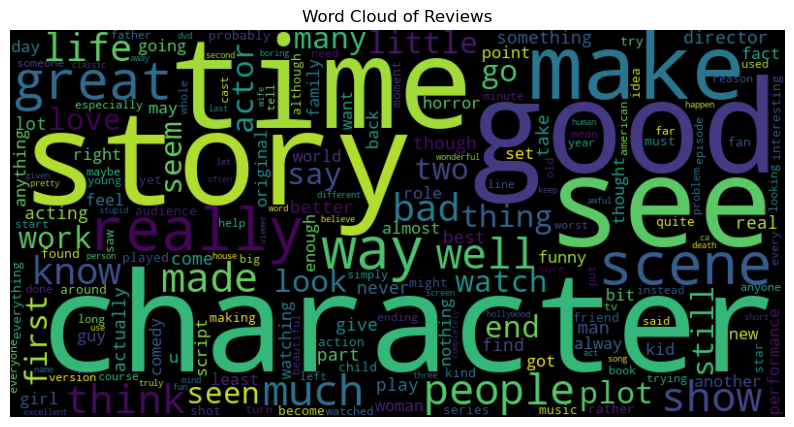

In [158]:
# Combine all reviews into a single string
all_reviews = ' '.join(x_l)
# Create wordcloud
wordcloud=WordCloud(width=800, height=400, background_color='Black').generate(all_reviews)

#Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

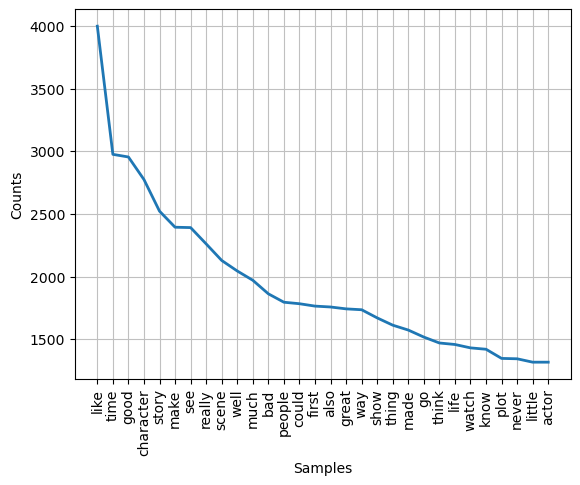

In [159]:
#plotting the top used words in reviews
#Tokenize the text into words
words=nltk.word_tokenize(all_reviews)

freq_dist=FreqDist(words)
freq_dist.plot(30)  #top 30 most frequent words
plt.show()

In [160]:
x_l

0       reviewer mentioned watching oz episode hooked ...
1       wonderful little production filming technique ...
2       thought wonderful way spend time hot summer we...
3       basically family little boy jake think zombie ...
4       petter mattei love time money visually stunnin...
                              ...                        
4998    rented hearing chris gore saying something eff...
4999    big disappointment think worst mastroiannimovi...
5000    everyone top lover black comedy cast including...
5001    typical hollywood fare though picking bad ofte...
5002    rko radio picture made real classic managed no...
Name: review, Length: 5000, dtype: object

In [161]:
#decided to perform only lemmatization. lemmatized data will be able to provide more contextual words
'''from nltk.stem import PorterStemmer as ps
x_st=x_l.apply(lambda doc:' '.join(ps().stem(word) for word in doc.split()))
print(x_st)'''

"from nltk.stem import PorterStemmer as ps\nx_st=x_l.apply(lambda doc:' '.join(ps().stem(word) for word in doc.split()))\nprint(x_st)"

In [162]:
#The min_df parameter causes TfidVectorizer to throw away any term that occurs in too few documents (because it won't have any predictive value).
#fit to vectorizer to understand the vocbulary and frequency
vectorizer = TfidfVectorizer(min_df=1)
x_vector=vectorizer.fit(x_l)
print("Vocabulary: ", vectorizer.vocabulary_)

Vocabulary:  {'reviewer': 28824, 'mentioned': 21488, 'watching': 37634, 'oz': 24796, 'episode': 11101, 'hooked': 16090, 'right': 28988, 'exactly': 11442, 'happened': 15098, 'first': 12490, 'thing': 34699, 'struck': 33282, 'brutality': 4365, 'unflinching': 36308, 'scene': 30002, 'violence': 37214, 'set': 30731, 'word': 38403, 'go': 14084, 'trust': 35683, 'show': 31165, 'faint': 11871, 'hearted': 15419, 'timid': 34961, 'pull': 27172, 'punch': 27199, 'regard': 28180, 'drug': 10079, 'sex': 30782, 'hardcore': 15131, 'classic': 5987, 'use': 36762, 'called': 4770, 'nickname': 23327, 'given': 13958, 'oswald': 24480, 'maximum': 21143, 'security': 30379, 'state': 32830, 'penitentary': 25383, 'focus': 12793, 'mainly': 20588, 'emerald': 10756, 'city': 5928, 'experimental': 11653, 'section': 30372, 'prison': 26759, 'cell': 5295, 'glass': 13996, 'front': 13256, 'face': 11823, 'inwards': 17652, 'privacy': 26767, 'high': 15722, 'agenda': 573, 'em': 10706, 'home': 16008, 'many': 20811, 'aryan': 1828, '

In [163]:
#vectorized representation from the learned data
vector=vectorizer.transform(x_l)
X=(vector.toarray())
X.shape

(5000, 39015)

##### **Model Building and Prediction**

In [172]:
# Define the split ratios to try
split_ratios = [0.7,0.8,0.9]  # You can modify this list with desired ratios

best_split_ratio = None
best_accuracy = 0.0

for split_ratio in split_ratios:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=split_ratio,random_state=33)

    #Bernoulli Naive Bayes model
    #since the target features are binary variables I found use of bernoulli naive bayes
    #as the best algo to predict 
    model=BernoulliNB().fit(X_train,Y_train)
    Y_pred= model.predict(X_test)    
    acc = accuracy_score(Y_test, Y_pred)
    
    print("Split ratio: {:.1f} / {:.1f}, Test set accuracy: {:.4f}".format(split_ratio, 1-split_ratio, acc))

    #ficd the best split ratio
    if acc > best_accuracy:
        best_accuracy = acc
        best_split_ratio = split_ratio
print("\nBest split ratio: {:.1f} / {:.1f}, Best test set accuracy: {:.4f}".format(best_split_ratio, 1-best_split_ratio, best_accuracy))


Split ratio: 0.7 / 0.3, Test set accuracy: 0.8433
Split ratio: 0.8 / 0.2, Test set accuracy: 0.8420
Split ratio: 0.9 / 0.1, Test set accuracy: 0.8520

Best split ratio: 0.9 / 0.1, Best test set accuracy: 0.8520


In [173]:
#making the model with bets split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,train_size=0.9,test_size=0.1,random_state=33)
model=BernoulliNB().fit(X_train,Y_train)
Y_pred= model.predict(X_test)    
acc = accuracy_score(Y_test, Y_pred)

In [166]:
#Compute test set accuracy
acc=accuracy_score(Y_test, Y_pred)
print("Test set accuracy: {:.4f}".format(acc))

Test set accuracy: 0.8520


In [167]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[224  28]
 [ 46 202]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       252
           1       0.88      0.81      0.85       248

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



*The model founds to achieve 85% accuracy in prediction*

In [168]:
from sklearn.metrics import roc_curve, auc
Y_pred= model.predict(X_test)
fpr, tpr, thresholds=roc_curve(Y_test,Y_pred,pos_label=1)
auc=auc(fpr, tpr)
auc

0.8517025089605734

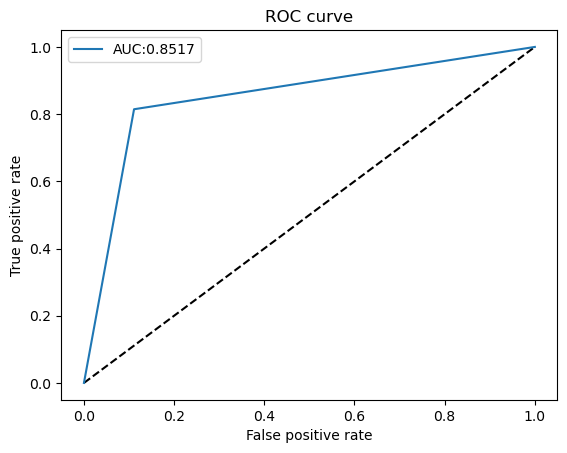

In [169]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC:{:.4f}'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()